# Table of Contents
1. Import Libraries, Define Path, Import Files, Remove Unneeded Columns
2. Data Preprocessing
3. Elbow Technique
4. K-means Clustering

# 1. Import Libraries, Define Path, Import Files, Remove Unneeded Columns

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\heidi\Desktop\Analyses\A6 Data Project'

In [6]:
real = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'real.5.1.22.csv'))

In [7]:
real.shape

(39030, 20)

In [8]:
real.head()

,Unnamed: 0,state,city,type,lat,lng,pop,male_pop,female_pop,rent_mean,income_mean,mort_exp_mean,expenses_mean,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,female_age_mean,pct_own,rent_cost
0,0,Alaska,Unalaska,City,53.621091,-166.770979,4619,2725,1894,1366.24657,107394.63090,2266.225620,840.67205,0.82841,0.82784,0.82940,38.45838,32.78177,0.25053,medium
1,1,Alaska,Eagle River,City,61.174250,-149.284329,3727,1780,1947,2347.69441,136547.39120,2485.107770,712.33066,0.94090,0.97253,0.91503,37.26216,38.97956,0.94989,high
2,2,Alaska,Jber,City,61.284745,-149.653973,8736,5166,3570,2071.30766,69361.23167,1631.830383,525.89101,0.99097,0.99661,0.98408,21.96291,22.20427,0.00759,high
3,3,Alaska,Anchorage,City,61.229560,-149.893037,1941,892,1049,943.79086,66790.89936,2289.791860,491.86501,0.89274,0.94301,0.84871,35.81912,37.00750,0.20247,medium
4,4,Alaska,Anchorage,City,61.217082,-149.767214,5981,3076,2905,1372.84472,76752.81635,1904.164100,681.80199,0.95351,0.96060,0.94669,34.13110,34.96611,0.56936,medium


In [9]:
#drop unneeded columns and categorical columns
real2 = real.drop(columns = ['Unnamed: 0', 'rent_cost', 'state', 'city', 'type'])
real2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39030 entries, 0 to 39029
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lat               39030 non-null  float64
 1   lng               39030 non-null  float64
 2   pop               39030 non-null  int64  
 3   male_pop          39030 non-null  int64  
 4   female_pop        39030 non-null  int64  
 5   rent_mean         39030 non-null  float64
 6   income_mean       39030 non-null  float64
 7   mort_exp_mean     39030 non-null  float64
 8   expenses_mean     39030 non-null  float64
 9   hs_degree         39030 non-null  float64
 10  hs_degree_male    39030 non-null  float64
 11  hs_degree_female  39030 non-null  float64
 12  male_age_mean     39030 non-null  float64
 13  female_age_mean   39030 non-null  float64
 14  pct_own           39030 non-null  float64
dtypes: float64(12), int64(3)
memory usage: 4.5 MB


# 2. Data Preprocessing

In [11]:
# as we have a varying ranges of small numbers from percentages in graduation rates to small whole numbers like ages 
# to income, we need to scale
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(real2)

In [12]:
# use PCA to fit our standardized data
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [13]:
# show how much variance we have
pca.explained_variance_ratio_

array([3.25762971e-01, 2.11885994e-01, 1.33494207e-01, 9.48889613e-02,
       7.04765428e-02, 5.84535209e-02, 4.43714986e-02, 1.94300135e-02,
       1.03689512e-02, 9.93408207e-03, 8.81118815e-03, 6.69709199e-03,
       5.18094561e-03, 2.44031471e-04, 3.68294753e-33])

Text(0, 0.5, 'Cumulative Explained Variance')

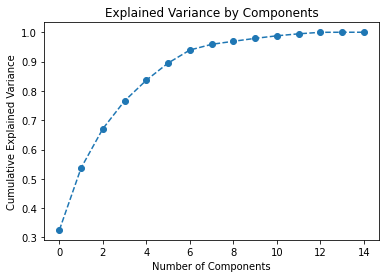

In [21]:
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

According to https://365datascience.com/tutorials/python-tutorials/pca-k-means/, rule of thumb is to keep 80% of the variance, so if I keep around 6 components, that should give me enough information with variability to get some good results.

In [22]:
# we are keeping 6 components based on the above graph
pca = PCA(n_components = 6)

In [23]:
# fit the model with the selected number of components
pca.fit(segmentation_std)

PCA(n_components=6)

In [24]:
# transform the data
pca.transform(segmentation_std)

array([[ 0.86648852,  1.33201876, -3.08943105, -0.65452811,  2.91521969,
         3.90720332],
       [ 3.86081212,  0.0648645 , -2.47008798, -0.81773798,  2.54485378,
         4.26259828],
       [ 1.28487683,  5.03507919, -2.60578938, -4.84425297,  2.36923626,
         3.21635664],
       ...,
       [-1.37084401, -1.54411384,  0.59332092, -1.01302647,  0.92656486,
         1.28163708],
       [ 0.57571758, -1.37203204,  1.02061068, -0.28540789,  0.7753946 ,
         1.34103839],
       [-0.4252328 , -0.72013702,  0.71411994, -0.6168877 ,  0.73965432,
         1.22829291]])

In [27]:
# score the transformation
scores_pca = pca.transform(segmentation_std)

scores_pca

array([[ 0.86648852,  1.33201876, -3.08943105, -0.65452811,  2.91521969,
         3.90720332],
       [ 3.86081212,  0.0648645 , -2.47008798, -0.81773798,  2.54485378,
         4.26259828],
       [ 1.28487683,  5.03507919, -2.60578938, -4.84425297,  2.36923626,
         3.21635664],
       ...,
       [-1.37084401, -1.54411384,  0.59332092, -1.01302647,  0.92656486,
         1.28163708],
       [ 0.57571758, -1.37203204,  1.02061068, -0.28540789,  0.7753946 ,
         1.34103839],
       [-0.4252328 , -0.72013702,  0.71411994, -0.6168877 ,  0.73965432,
         1.22829291]])

# 3. Elbow Technique

In [28]:
# fit the K means using the transformed data from the PCA
wcss = []
for i in range (1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

Text(0.5, 1.0, 'K-means with PCA Clustering')

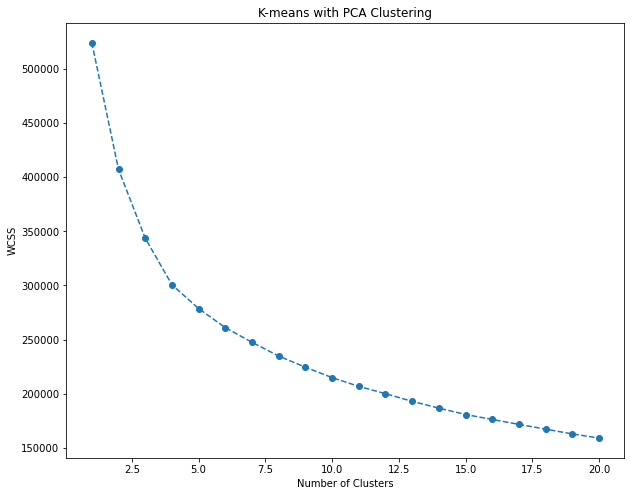

In [30]:
# plot the outcome
pl.figure(figsize = (10,8))
pl.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
pl.xlabel('Number of Clusters')
pl.ylabel('WCSS')
pl.title('K-means with PCA Clustering')

From the graph, the elbow appears at 4 so we'll keep 4 clusters

# 4. K-means Clustering

In [39]:
# Create the k-means object.

kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [40]:
# Fit the k-means object to the data.

kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [41]:
# create new df with the original features and add the PCA scores and assigned clusters
df_segm_pca_kmeans = pd.concat([real2.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-6: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6']
# add column with pca kmeans clustering labels
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head(10)

,lat,lng,pop,male_pop,female_pop,rent_mean,income_mean,mort_exp_mean,expenses_mean,hs_degree,...,male_age_mean,female_age_mean,pct_own,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K-means PCA
0,53.621091,-166.770979,4619,2725,1894,1366.24657,107394.63090,2266.225620,840.67205,0.82841,...,38.45838,32.78177,0.25053,0.866489,1.332019,-3.089431,-0.654528,2.915220,3.907203,0
1,61.174250,-149.284329,3727,1780,1947,2347.69441,136547.39120,2485.107770,712.33066,0.94090,...,37.26216,38.97956,0.94989,3.860812,0.064864,-2.470088,-0.817738,2.544854,4.262598,0
2,61.284745,-149.653973,8736,5166,3570,2071.30766,69361.23167,1631.830383,525.89101,0.99097,...,21.96291,22.20427,0.00759,1.284877,5.035079,-2.605789,-4.844253,2.369236,3.216357,1
3,61.229560,-149.893037,1941,892,1049,943.79086,66790.89936,2289.791860,491.86501,0.89274,...,35.81912,37.00750,0.20247,0.018163,-1.161180,-2.632167,-2.512949,2.363820,4.217783,2
4,61.217082,-149.767214,5981,3076,2905,1372.84472,76752.81635,1904.164100,681.80199,0.95351,...,34.13110,34.96611,0.56936,1.844692,1.637986,-1.203303,-2.576594,2.069555,4.262966,1
5,61.217507,-149.744426,5476,2916,2560,1351.27532,81877.97542,2060.457160,667.73315,0.87941,...,29.23608,33.63770,0.45011,0.854217,1.853101,-2.280433,-2.393987,1.925158,4.322351,1
6,61.223372,-149.723327,5893,3037,2856,1022.91322,65167.78407,1868.628790,511.26360,0.86077,...,36.01941,34.54987,0.51995,0.255200,1.606155,-0.937362,-2.021764,1.997532,4.694199,1
7,61.216701,-149.792744,7481,3766,3715,1101.88070,65639.50913,1802.360770,731.57153,0.87654,...,30.85796,31.90301,0.52659,0.727511,3.088740,-1.172022,-2.462357,1.581780,4.582905,1
8,61.215067,-149.836271,5501,3139,2362,884.61089,52556.63645,1939.951130,562.66116,0.79679,...,31.35271,30.84458,0.33319,-0.954532,1.911265,-1.987246,-2.302182,1.728935,4.671024,1
9,61.204383,-149.852526,3225,1565,1660,991.76412,70388.07608,1728.234620,633.92151,0.85196,...,38.86716,43.54596,0.38822,0.222117,-0.762147,-1.424621,-1.353913,2.018147,4.812180,2


In [54]:
# clusters value counts
df_segm_pca_kmeans['Segment K-means PCA'].value_counts()

2    15980
1     7830
0     7796
3     7424
Name: Segment K-means PCA, dtype: int64

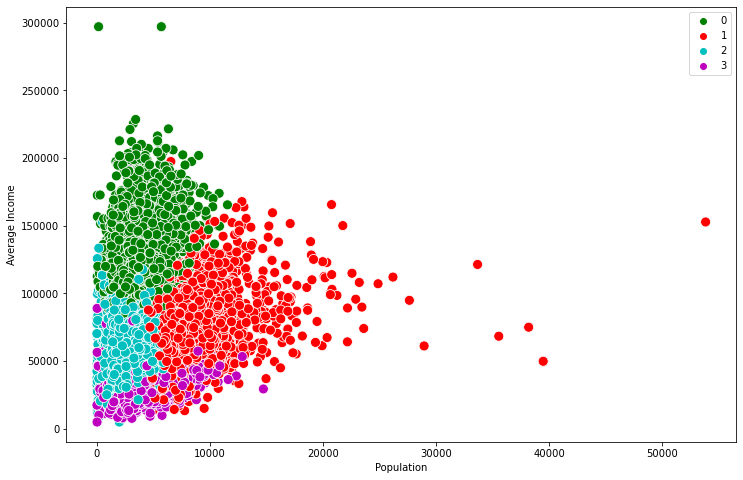

In [55]:
# plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_segm_pca_kmeans['pop'], y=df_segm_pca_kmeans['income_mean'], hue=kmeans_pca.labels_, 
                     palette = ['g', 'r', 'c', 'm'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population') # Label x-axis.
plt.ylabel('Average Income') # Label y-axis.
plt.show()

It looks as though population isn't a good determining factor for income. I'd think the bigger population centers would allow more people to make more money, otherwise, why congreate there? The data does not look to bear this out.

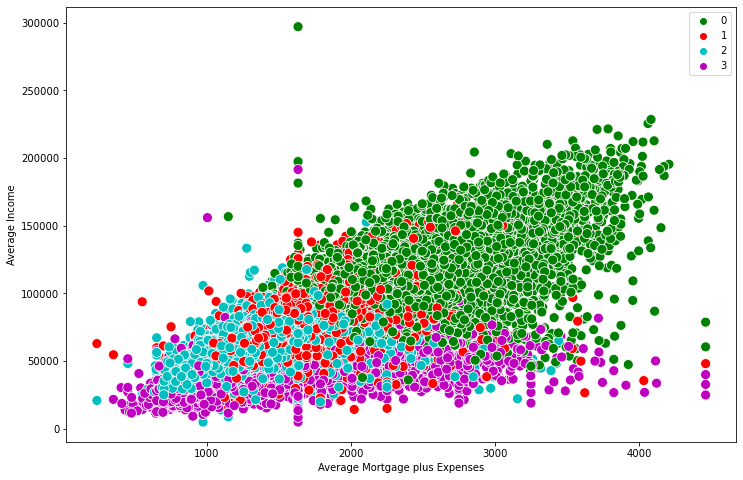

In [56]:
# plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_segm_pca_kmeans['mort_exp_mean'], y=df_segm_pca_kmeans['income_mean'], hue=kmeans_pca.labels_, 
                     palette = ['g', 'r', 'c', 'm'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average Mortgage plus Expenses') # Label x-axis.
plt.ylabel('Average Income') # Label y-axis.
plt.show()

This is more what we were expecting, higher average income means more money to spend on mortgage and general upkeep expenses.

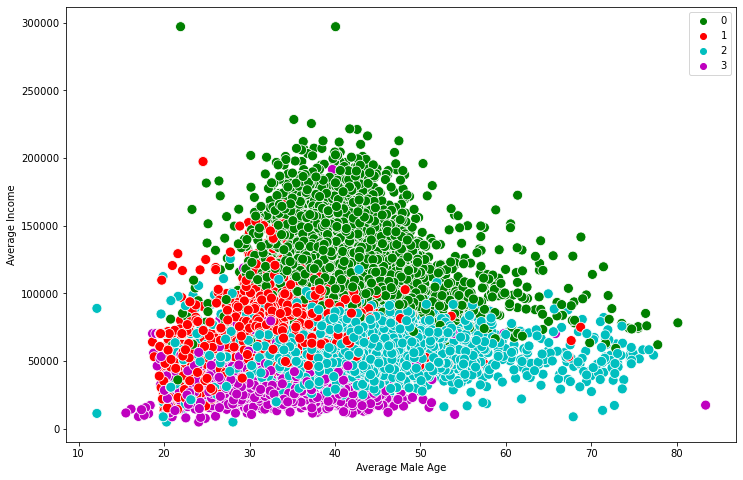

In [57]:
# plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_segm_pca_kmeans['male_age_mean'], y=df_segm_pca_kmeans['income_mean'], hue=kmeans_pca.labels_, 
                     palette = ['g', 'r', 'c', 'm'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average Male Age') # Label x-axis.
plt.ylabel('Average Income') # Label y-axis.
plt.show()

Average male age in an area doesn't necessarily correlate to average income in the area.

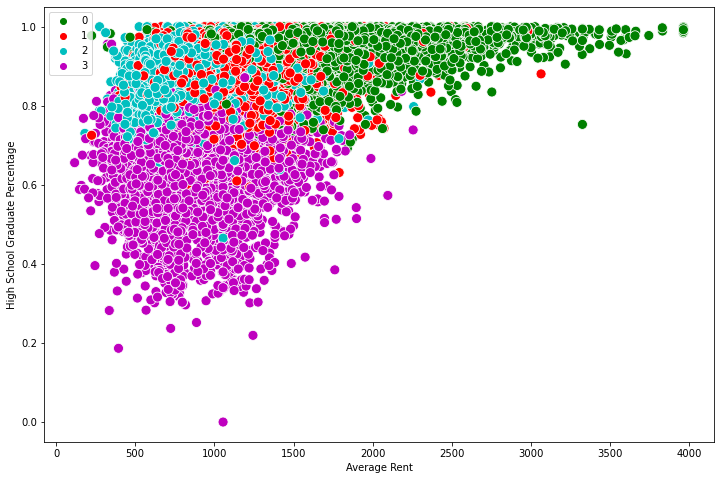

In [58]:
# plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_segm_pca_kmeans['rent_mean'], y=df_segm_pca_kmeans['hs_degree'], hue=kmeans_pca.labels_, 
                     palette = ['g', 'r', 'c', 'm'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average Rent') # Label x-axis.
plt.ylabel('High School Graduate Percentage') # Label y-axis.
plt.show()

Rent in an area goes up where there are more high school graduates.

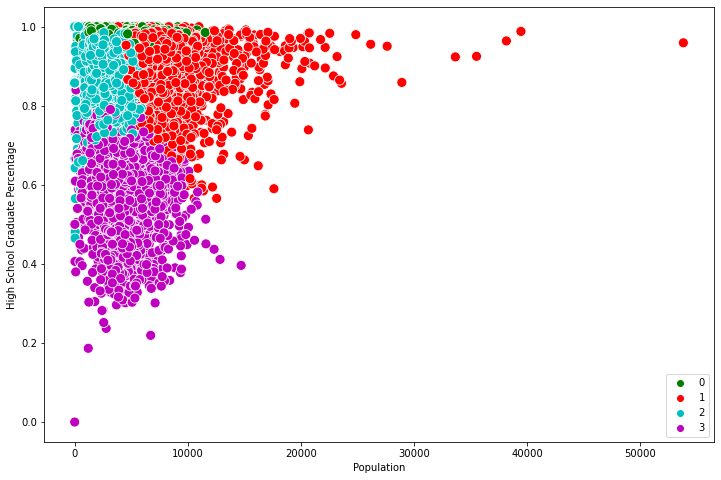

In [59]:
# plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_segm_pca_kmeans['pop'], y=df_segm_pca_kmeans['hs_degree'], hue=kmeans_pca.labels_, 
                     palette = ['g', 'r', 'c', 'm'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population') # Label x-axis.
plt.ylabel('High School Graduate Percentage') # Label y-axis.
plt.show()

Mainly all population options have a high graduation rate, with of course, smaller populations showing a lower graduation rate. These are almost definitely rural areas where unskilled labor leads to skilled labor and education isn't necessarily as important as labor.

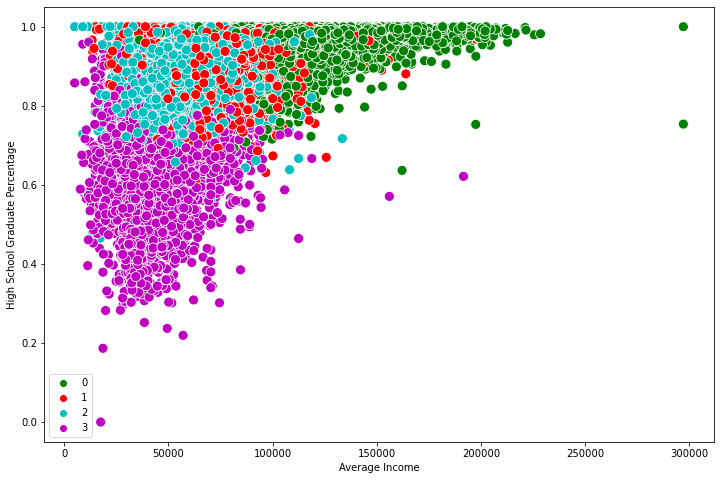

In [60]:
# plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_segm_pca_kmeans['income_mean'], y=df_segm_pca_kmeans['hs_degree'], hue=kmeans_pca.labels_, 
                     palette = ['g', 'r', 'c', 'm'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average Income') # Label x-axis.
plt.ylabel('High School Graduate Percentage') # Label y-axis.
plt.show()

Once again, higher income comes from a higher degree, but unskilled labor does reign in certain areas.

In [61]:
df_segm_pca_kmeans.loc[df_segm_pca_kmeans['Segment K-means PCA'] == 3, 'cluster'] = 'm'
df_segm_pca_kmeans.loc[df_segm_pca_kmeans['Segment K-means PCA'] == 2, 'cluster'] = 'c'
df_segm_pca_kmeans.loc[df_segm_pca_kmeans['Segment K-means PCA'] == 1, 'cluster'] = 'r'
df_segm_pca_kmeans.loc[df_segm_pca_kmeans['Segment K-means PCA'] == 0, 'cluster'] = 'g'

In [62]:
df_segm_pca_kmeans.groupby('cluster').agg({'hs_degree':['mean', 'median'], 
                         'income_mean':['mean', 'median'], 
                         'pop':['mean', 'median'],
                          'expenses_mean':['mean', 'median']})

hs_degree              income_mean                         pop  \
             mean    median           mean         median         mean   
cluster                                                                  
c        0.881978  0.887605   60625.780394   59541.953290  3259.706696   
g        0.943369  0.955900  113087.175557  109422.237550  4203.159954   
m        0.680830  0.702195   43218.765703   41454.897455  3969.264547   
r        0.890529  0.902915   73417.742585   71348.136005  6989.549936   

                expenses_mean              
         median          mean      median  
cluster                                    
c        3304.0    460.101028  443.038920  
g        4109.0    835.738098  799.339840  
m        3872.0    435.261597  397.015690  
r        6503.5    508.204211  486.333455

These results would be useful in determining why there are higher concentrations of children not graduating from high school. Next steps would be to isolate the lower graduation rates, cross reference against income, population totals to begin to see why. It would also be helpful to isolate the extremely high rates against whatever the results are, low income vs high income and low vs high populations to see why certain areas of low income, low population have low graduation rates while others with low income, low population have high graduation rates and see what those differences are.

In [63]:
#export to csv
df_segm_pca_kmeans.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'PCA KMeans.5.3.22.csv'))